### Import libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter

### merging sales data

In [2]:
frames = []
directory = "Sales_Data"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and f[-3:] == "csv":
            tempdf = pd.read_csv(f)
            frames.append(tempdf.dropna(how="all"))
df_all_months = pd.concat(frames)
df_all_months = df_all_months[df_all_months['Order ID'] != "Order ID"]
df_all_months.to_csv("all_data.csv", index=False)

### Import all sales data

In [3]:
df_all_sales = pd.read_csv("all_data.csv")
df_all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add additional coloums

#### Task 1:Add month

In [4]:
df_all_sales["Month"] = df_all_sales["Order Date"].str[0:2]
df_all_sales["Month"] = df_all_sales["Month"].astype('int32')

#### Task 2: Add a sales

In [5]:
df_all_sales['Total Sales'] = df_all_sales['Quantity Ordered'] * df_all_sales['Price Each']
df_all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Question 1: What was the best month for sales? 

In [6]:
results = df_all_sales.groupby(['Month']).sum()
results

,Order ID,Quantity Ordered,Price Each,Total Sales
Month,,,,
1,1421630798,10903,1811768.38,1822256.73
2,1871052592,13449,2188884.72,2202022.42
3,2564810956,17005,2791207.83,2807100.38
4,3387347100,20558,3367671.02,3390670.24
5,3345871523,18667,3135125.13,3152606.75
6,2932976072,15253,2562025.61,2577802.26
7,3284139576,16072,2632539.56,2647775.76
8,2899373917,13448,2230345.42,2244467.88
9,2948726831,13109,2084992.09,2097560.13


#### Plot results

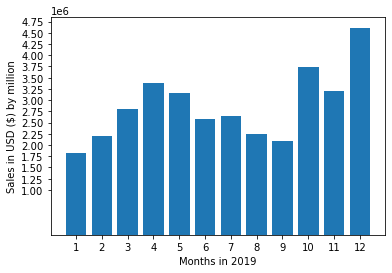

In [7]:
months = range(1, 13)
plt.bar(months, results['Total Sales'])
plt.xlabel("Months in 2019")
plt.xticks(months)
plt.ylabel('Sales in USD ($) by million')
plt.yticks(np.arange(1000000, 5000000, 250000))
plt.show()

## Question 2: what US city had the highest number of sales? 

In [8]:
df_all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### create city column

In [9]:

df_all_sales["City"] = df_all_sales.apply(lambda x: f"{x['Purchase Address'].split(',')[1]} ({x['Purchase Address'].split(',')[2].split(' ')[1]})", axis = 1)

df_all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


#### Group and order by city

In [10]:
results = df_all_sales.groupby(['City']).sum()
citys = results.index.values.tolist()

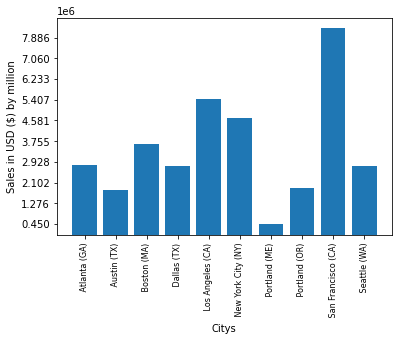

In [11]:
plt.bar(citys, results['Total Sales'])
plt.xlabel("Citys")
plt.xticks(citys, rotation="vertical", size=8)
plt.ylabel('Sales in USD ($) by million')
plt.yticks(np.arange(results['Total Sales'].min(), results['Total Sales'].max(), results['Total Sales'].max() / 10))
plt.show()

## Question 3: What time is the best time to advertise products? 

### convert orderdate to date time type

In [12]:
df_all_sales['Order Date'] = pd.to_datetime(df_all_sales['Order Date'])
df_all_sales['Hour'] = df_all_sales['Order Date'].dt.hour
df_all_sales['Minute'] = df_all_sales['Order Date'].dt.hour
df_all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,9
...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,20
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,16
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,7
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,17


In [13]:
results = df_all_sales.groupby(['Hour']).sum()
hours = results.index.values.tolist()
results

,Order ID,Quantity Ordered,Price Each,Month,Total Sales,Minute
Hour,,,,,,
0,900957895,4428,709296.70,27554,713721.27,0
1,543233054,2619,458490.00,16657,460866.88,2350
2,282406945,1398,233833.64,8507,234851.44,2486
3,192204437,928,144726.42,5904,145757.89,2493
4,199203689,937,162058.18,6148,162661.01,3416
5,304469096,1493,229621.21,9301,230679.82,6605
6,572128866,2810,445000.11,17539,448113.00,14892
7,932045284,4556,740568.11,28850,744854.12,28077
8,1434064539,7002,1185970.62,43626,1192348.97,50048


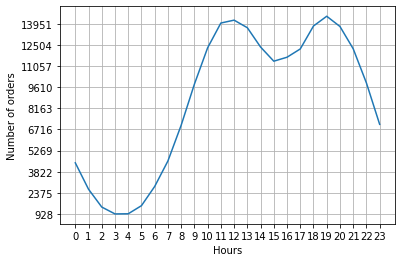

In [14]:
plt.plot(hours, results['Quantity Ordered'])
plt.xticks(hours)
plt.xlabel("Hours")
plt.yticks(np.arange(results['Quantity Ordered'].min(), results['Quantity Ordered'].max(), results['Quantity Ordered'].max() / 10))
plt.ylabel('Number of orders')
plt.grid()
plt.show()

## Question 4: what products are mostly sold together? 

In [15]:
df_sold_together = df_all_sales[df_all_sales['Order ID'].duplicated(keep=False)]
df_sold_together['Grouped'] = df_sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#df_sold_together['Number Of Items Orderd'] = df_sold_together['Grouped'].apply(lambda x: len(x.split(',')))
#df_sold_together = df_sold_together.sort_values(by='Number Of Items Orderd', ascending=False)
df = df_sold_together[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\sajmc\AppData\Local\Temp/ipykernel_9060/1936488583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sold_together['Grouped'] = df_sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [16]:
counter = Counter()

for grouped_str in df['Grouped']:
    sub_str = grouped_str.split(',')
    counter.update(Counter(combinations(sub_str,2)))
counter.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Question 5: What product sold the most? 

In [29]:
df_result = df_all_sales.groupby('Product').sum()[['Quantity Ordered']].sort_values('Quantity Ordered', ascending=False)
df_result

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


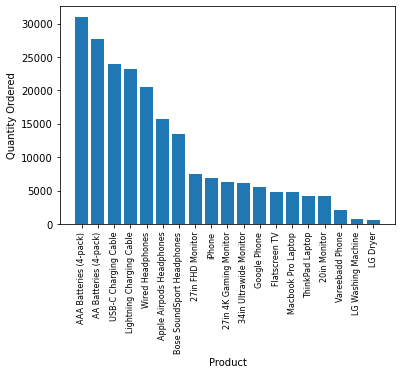

In [36]:
products = df_result.index.values.tolist()
plt.bar(products, df_result['Quantity Ordered'])
plt.xlabel("Product")
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel('Quantity Ordered') 
plt.show()